### Test of outlier

- outliers are extreme values in the data.
- to find the outlier, the stat. is used is q1 and q3
    1. calc. val. of iqr = q3-q1 
    2. calc. the left cutoff = q1 - 1.5iqr & right cutoff = q3 + 1.5iqr
    3. all the values that are < left_cutoff and > right_cutoff are outliers
    3. calc. the no. of outlier from both the criteria then report the total no. of outliers  

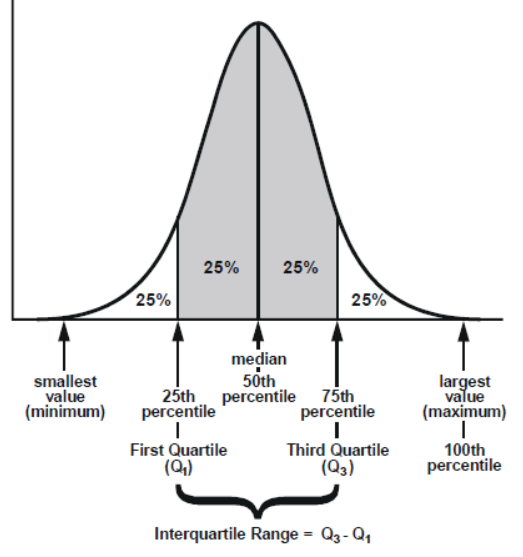

In [42]:
import matplotlib.pyplot as plt # for visualization
import pandas as pd             # for playing with data 

In [43]:
# importing data
df_hsb2 = pd.read_csv('./hsb2.csv') 
df_insurence = pd.read_csv('./insurance.csv')

**calc the no. of outliers for the following variabes from 'insurance' : bmi, expenses**

In [44]:
# no. of outlier in insurense.bmi 

q1 = df_insurence['bmi'].quantile(.25)
q3 = df_insurence['bmi'].quantile(.75)
print(q1, q3) 

iqr = q3-q1 
print('iqr', iqr)

left_cutoff = q1 - 1.5*iqr 
right_cutoff = q3 + 1.5*iqr
print(left_cutoff, right_cutoff)

count = df_insurence[ (df_insurence['bmi'] < left_cutoff) & ( df_insurence['bmi'] > right_cutoff) ]
print(count['bmi'].sum())



26.3 34.7
iqr 8.400000000000002
13.699999999999998 47.300000000000004
0.0


In [45]:
# no. of outlier in  insurence.expenses

q1 = df_insurence['expenses'].quantile(.25)
q3 = df_insurence['expenses'].quantile(.75)
print(q1, q3) 

iqr = q3-q1 
print('iqr', iqr)

left_cutoff = max(q1 - 1.5*iqr, 0) 
right_cutoff = q3 + 1.5*iqr
print(left_cutoff, right_cutoff)

count = df_insurence[ (df_insurence['expenses'] < left_cutoff) & ( df_insurence['expenses'] > right_cutoff) ]
print(count['expenses'].sum())

4740.2875 16639.915
iqr 11899.6275
0 34489.35625
0.0


---
---

**normal distribution plot for the variable for : insurence.bmi, insurence.age, insurence.expences, hsb2.read, hsb2.write**

<AxesSubplot: ylabel='Density'>

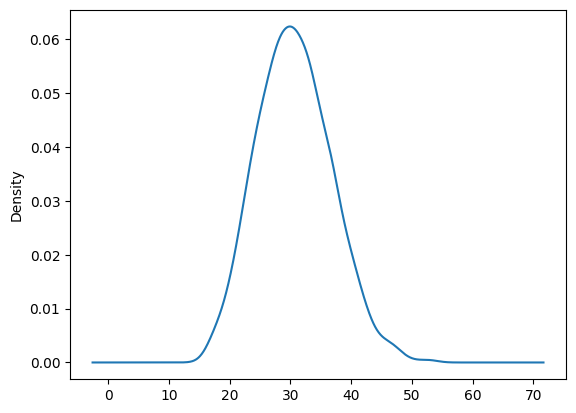

In [46]:
# normal distribution plot for instance.bmi
df_insurence['bmi'].plot.density()

<AxesSubplot: ylabel='Density'>

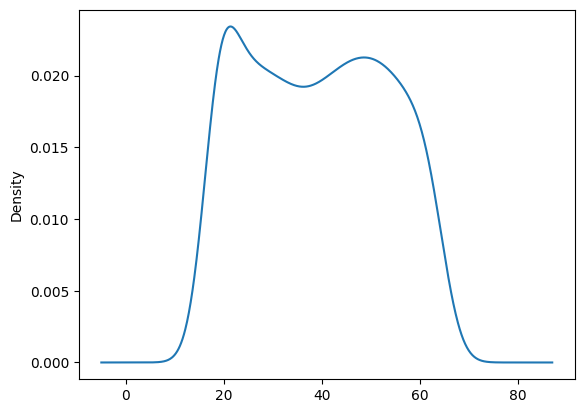

In [47]:
# normal distribution plot for instance.age
df_insurence['age'].plot.density()

<AxesSubplot: ylabel='Density'>

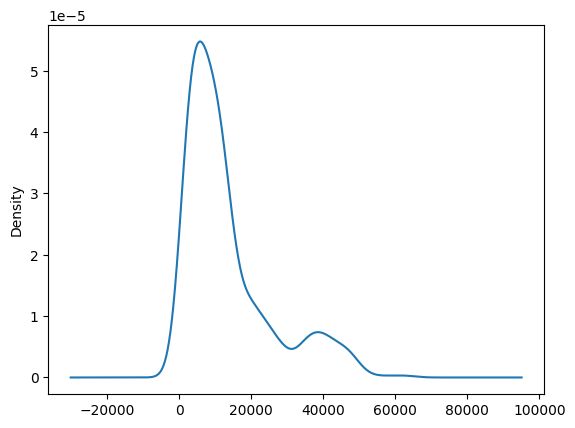

In [48]:
# normal distribution plot for instance.expences
df_insurence['expenses'].plot.density()

<AxesSubplot: ylabel='Density'>

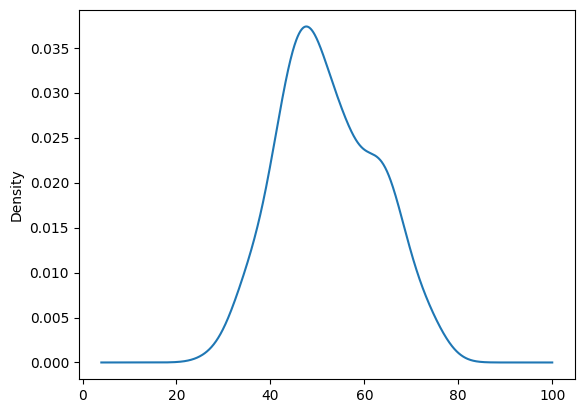

In [49]:
# normal distribution for hsb2.read
df_hsb2['read'].plot.density()

<AxesSubplot: ylabel='Density'>

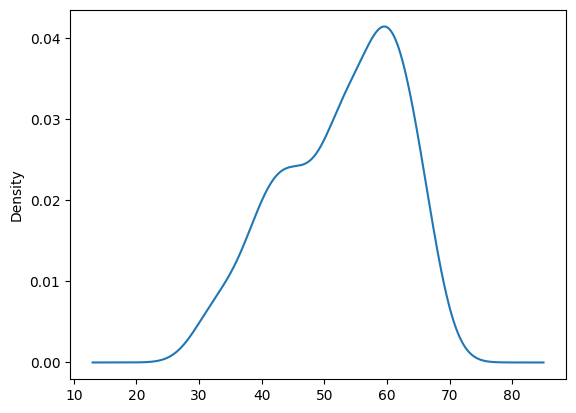

In [50]:
# normal distribution for hsb2.write 
df_hsb2['write'].plot.density()

---
---

**create a new variable avg. which is the avg. marks scored by students**


In [51]:
# create a new variable avg. which is the avg. marks scored by students 

df_hsb2['total'] = (df_hsb2['read'] + df_hsb2['write'] + df_hsb2['math'] + df_hsb2['science'] + df_hsb2['socst'])
df_hsb2['avg'] = df_hsb2['total'] / 5
df_hsb2

,id,Gender,race,ses,schtyp,prog,read,write,math,science,socst,total,avg
0,70,0,4,1,1,1,57,52,41,47,57,254,50.8
1,121,1,4,2,1,3,68,59,53,63,61,304,60.8
2,86,0,4,3,1,1,44,33,54,58,31,220,44.0
3,141,0,4,3,1,3,63,44,47,53,56,263,52.6
4,172,0,4,2,1,2,47,52,57,53,61,270,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,31,1,2,2,2,1,55,59,52,42,56,264,52.8
196,145,1,4,2,1,3,42,46,38,36,46,208,41.6
197,187,1,4,2,2,1,57,41,57,55,52,262,52.4
198,118,1,4,2,1,1,55,62,58,58,61,294,58.8


---
---

**Create a new variable x1 = bmi/age  & x2 = expense/age in hsb2 dataset** 

In [52]:
df_insurence['x1'] = df_insurence['bmi'] / df_insurence['expenses']
df_insurence['x2'] = df_insurence['expenses'] / df_insurence['age']
df_insurence

,age,sex,bmi,children,smoker,region,expenses,x1,x2
0,19,female,27.9,0,yes,southwest,16884.92,0.001652,888.680000
1,18,male,33.8,1,no,southeast,1725.55,0.019588,95.863889
2,28,male,33.0,3,no,southeast,4449.46,0.007417,158.909286
3,33,male,22.7,0,no,northwest,21984.47,0.001033,666.196061
4,32,male,28.9,0,no,northwest,3866.86,0.007474,120.839375
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0.002924,212.011000
1334,18,female,31.9,0,no,northeast,2205.98,0.014461,122.554444
1335,18,female,36.9,0,no,southeast,1629.83,0.022640,90.546111
1336,21,female,25.8,0,no,southwest,2007.95,0.012849,95.616667


---
---

**check for the presence of outliers in the variable hsb2.total**

In [57]:
q1 = df_hsb2['total'].quantile(.25) 
q3 = df_hsb2['total'].quantile(.75) 
iqr = q3-q1 
left_cutoff = q1 - 1.5*iqr 
right_cutoff = q3 + 1.5*iqr 
count = df_hsb2[(df_hsb2['total'] < left_cutoff) & (df_hsb2['total'] > right_cutoff)]
print('no. of outliers in hsb2.total:',count['total'].sum())

no. of outliers in hsb2.total: 0


---
---

**check for the normality of the variable total**

In [61]:
mn = df_hsb2['total'].mean() 
sd = df_hsb2['total'].std() 
x1 = mn-sd 
x2 = mn+sd 
count = df_hsb2[(df_hsb2['total'] > x1) & (df_hsb2['total'] < x2)]
normality = count['total'].shape[0] / df_hsb2.shape[0]
print('Normality:', normality)


Normality: 0.615


---
---

**check for missing values in variable total**

In [68]:
df_hsb2['total'].count() - df_hsb2.shape[0]

0

---
---

**check for outliers in x1**

In [73]:
q1 = df_insurence['x1'].quantile(.25)
q3 = df_insurence['x1'].quantile(.75)

iqr = q3 - q1 

left_cutoff = q1 - 1.5*iqr 
right_cutoff = q3 + 1.5*iqr 

outliers = df_insurence[(df_insurence['x1'] < left_cutoff) & (df_insurence['x1'] > right_cutoff)]['x1'] 

print('outliers in x1:', outliers.count())

outliers in x1: 0


---
---

**check for normality in the variable x2**

In [77]:
mn = df_insurence['x2'].mean()
sd = df_insurence['x2'].std()

x1 = mn - sd 
x2 = mn + sd 

count = df_insurence[(df_insurence['x2'] > x1) & (df_insurence['x2'] < x2)]['x2'] 

print('normality of x2:', count.shape[0]/df_insurence.shape[0])

normality of x2: 0.8550074738415545
